## Observations and Insights

### Looking at the boxplots, we observe no outlier of the final tumor volume of mice treated with the different drug regimen, except for Infubinol. Interestingly, the use of either Infubinol or Ceftamin did not reduce the tumor size of the mice treated with these drugs. Instead, the use of these 2 drugs increase the tumor size.

### Based on the statistics, the average final tumor volume of mice treated with Ramicane is slightly smaller than those treated by Capomulin. However, the analysis isn't sufficient for us to conclude that Ramicane is the most effective treatment regimen. 

### The regression analysis shows that mouse weight of mice treated with Capomulin correlates significantly with tumor volume. In other words, as mouse weight increases, tumor volume increases. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from decimal import Decimal

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# check if baseline measure for tumor volume is the same across all mice (i.e., tumor volume at timepoint = 0)
combined_data_baseline = combined_data.drop_duplicates(subset ="Mouse ID", keep = 'first')
print(f"The average baseline measure for tumor volume is {combined_data_baseline['Tumor Volume (mm3)'].mean()} (mm3)")

# display combined dataset and sorting it by mouse id and timepoint
combined_data = combined_data.sort_values(by=['Mouse ID','Timepoint'])
combined_data.head(10)

The average baseline measure for tumor volume is 45.0 (mm3)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen

# aggregate based on Drug Regimen to get mean, median, variance, standard deviation, and SEM of tumor volume
# (across all time points)
tumor_stats_summary = combined_data.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)' : \
                                                                       ['mean', 'median','var','std','sem']})
tumor_stats_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

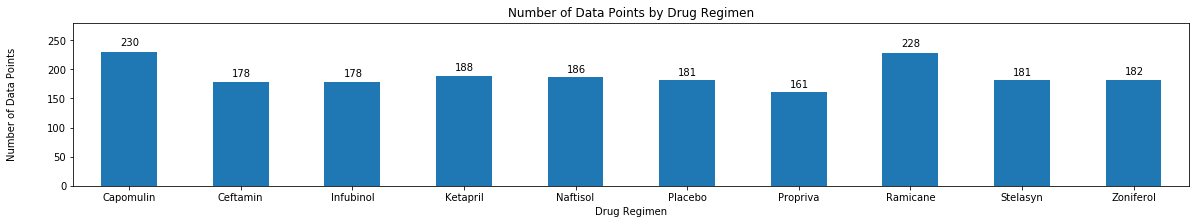

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# creating a dataframe with just drug regimen and counts of mouse ID
data_points_summary = combined_data.loc[:,('Drug Regimen','Mouse ID')]
data_points_summary = data_points_summary.groupby('Drug Regimen').count()

# Use DataFrame.plot() in order to create a bar chart of the data
ax = data_points_summary.plot(kind="bar", figsize=(20,3), legend = False, rot = 0, ylim=[0,(data_points_summary.values.max()
                                                                                            +50)])

for p in ax.patches:
    ax.annotate('{:}'.format(Decimal(str(p.get_height()))), (p.get_x()+.17, p.get_height()*1.05))

# Set a title and axis label for the chart
plt.title("Number of Data Points by Drug Regimen")
plt.ylabel("Number of Data Points", labelpad=30)

plt.show()

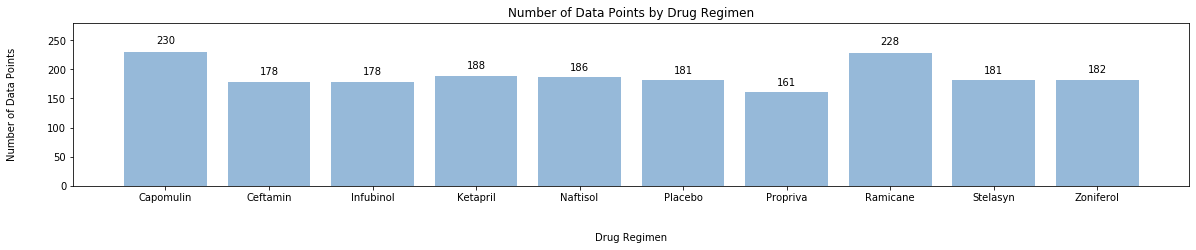

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(data_points_summary))

x_labels = data_points_summary.index.tolist()

# Capturing the number of data points into list
y_axis = data_points_summary['Mouse ID'].values.tolist()
    
# Generating the bar chart with number of data points per drug regimen
tick_drug_regimen = [value for value in x_axis]

plt.figure(figsize=(20,3))
bar_plot = plt.bar(x_axis, y_axis, color='#2F75B5', alpha=0.5, align="center")
plt.xticks(tick_drug_regimen, x_labels, rotation="horizontal")
plt.ylim(0, max(y_axis)+50)

# Set a title and axis label for the chart
plt.title("Number of Data Points by Drug Regimen")
plt.ylabel("Number of Data Points", labelpad=30)
plt.xlabel("Drug Regimen", labelpad=30)

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height*1.05, '%d' % int(height), ha='center', va='bottom')

plt.show()

## Pie plots

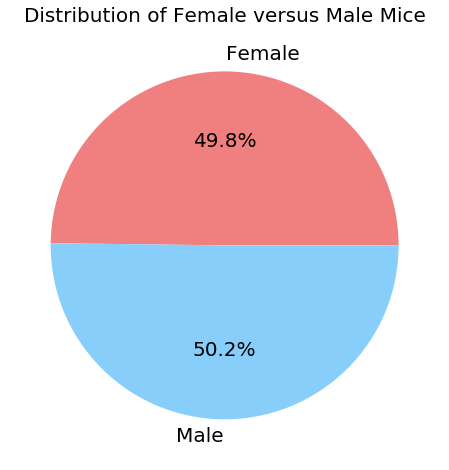

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Getting a dataframe with just unique mouse ID (in rows)
sex_data = combined_data.drop_duplicates(subset ="Mouse ID", 
                     keep = 'first', inplace = False)
sex_data = sex_data.loc[:,('Mouse ID','Sex')]

# creating a pie chart
sex_dist = sex_data.groupby('Sex').count()
plot = sex_dist.plot.pie(y='Mouse ID', autopct='%1.1f%%', figsize=(8, 8), legend = False, 
                            title='Distribution of Female versus Male Mice', colors = ['lightcoral', 'lightskyblue'], 
                            fontsize=20)

plot.title.set_size(20)
plot.set_ylabel('');

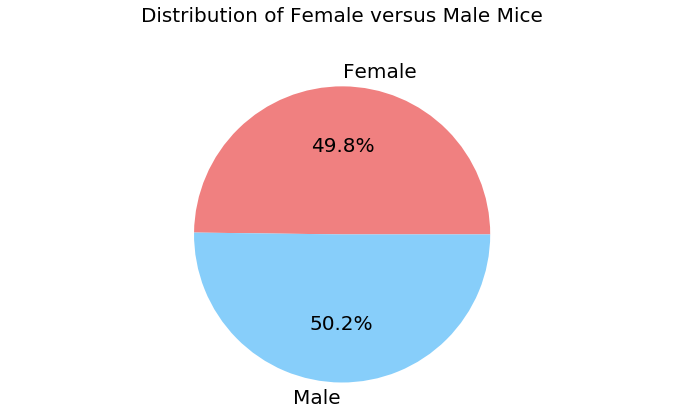

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist_ar = np.array(sex_dist['Mouse ID'])
sex = np.array(sex_dist.index)
colors = ["lightcoral","lightskyblue"]
textprops = {"fontsize":20} # Font size of text in pie chart

plt.figure(figsize = (12,6))
plt.pie(sex_dist_ar, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0,textprops=textprops)
plt.axis("equal")
plt.title('Distribution of Female versus Male Mice',fontsize=20,pad=50);

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Sort dataframe based on Mouse ID and tumor volume
combined_data = combined_data.sort_values(by=['Mouse ID', 'Timepoint'])

# Keeping the final timepoint of each mouse by dropping duplicates
final_timepoint = combined_data.drop_duplicates(subset ="Mouse ID", 
                     keep = 'last')
final_timepoint.sort_values(by='Mouse ID')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = final_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {round(lowerq,2)}")
print(f"The upper quartile of final tumor volume is: {round(upperq,2)}")
print(f"The interquartile range of final tumor volume is: {round(iqr,2)}")
print(f"The the median of final tumor volume is: {round(quartiles[0.5],2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

number_outliers = len(final_timepoint.loc[(final_timepoint['Tumor Volume (mm3)']<lower_bound)|
                                      (final_timepoint['Tumor Volume (mm3)']>upper_bound)])
print(f"The number of potential outlier(s) is: {number_outliers}")

The lower quartile of final tumor volume is: 45.93
The upper quartile of final tumor volume is: 64.96
The interquartile range of final tumor volume is: 19.02
The the median of final tumor volume is: 55.84 
Values below 17.4 could be outliers.
Values above 93.49 could be outliers.
The number of potential outlier(s) is: 0


In [8]:
# create a function to find out the statistics of tumor volume by drug regimen

def stats(drug_regimen):
        treatment_data = final_timepoint.loc[final_timepoint['Drug Regimen']==drug_regimen]
        treatment_quartiles = treatment_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
        treatment_lowerq = treatment_quartiles[0.25]
        treatment_upperq = treatment_quartiles[0.75]
        treatment_iqr = treatment_upperq-treatment_lowerq

        print(f"The lower quartile of final tumor volume treated by {drug_regimen} is: {round(treatment_lowerq,2)}")
        print(f"The upper quartile of final tumor volume treated by {drug_regimen} is: {round(treatment_upperq,2)}")
        print(f"The interquartile of final tumor volume treated by {drug_regimen} is: {round(treatment_iqr,2)}")
        print(f"The the median of final tumor volume treated by {drug_regimen} is: {round(treatment_quartiles[0.5],2)}")

        treatment_lower_bound = treatment_lowerq - (1.5*treatment_iqr)
        treatment_upper_bound = treatment_upperq + (1.5*treatment_iqr)
        print(f"Values below {round(treatment_lower_bound,2)} could be outliers.")
        print(f"Values above {round(treatment_upper_bound,2)} could be outliers.")
        treatment_outliers = len(treatment_data.loc[(treatment_data['Tumor Volume (mm3)']<treatment_lower_bound)|
                                                (treatment_data['Tumor Volume (mm3)']>treatment_upper_bound)])
        print(f"The number of outlier(s) treated using {drug_regimen} is: {treatment_outliers}")

In [9]:
stats('Capomulin')

The lower quartile of final tumor volume treated by Capomulin is: 32.38
The upper quartile of final tumor volume treated by Capomulin is: 40.16
The interquartile of final tumor volume treated by Capomulin is: 7.78
The the median of final tumor volume treated by Capomulin is: 38.13
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
The number of outlier(s) treated using Capomulin is: 0


In [10]:
stats('Ramicane')

The lower quartile of final tumor volume treated by Ramicane is: 31.56
The upper quartile of final tumor volume treated by Ramicane is: 40.66
The interquartile of final tumor volume treated by Ramicane is: 9.1
The the median of final tumor volume treated by Ramicane is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The number of outlier(s) treated using Ramicane is: 0


In [11]:
stats('Infubinol')

The lower quartile of final tumor volume treated by Infubinol is: 54.05
The upper quartile of final tumor volume treated by Infubinol is: 65.53
The interquartile of final tumor volume treated by Infubinol is: 11.48
The the median of final tumor volume treated by Infubinol is: 60.17
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
The number of outlier(s) treated using Infubinol is: 1


In [12]:
stats('Ceftamin')

The lower quartile of final tumor volume treated by Ceftamin is: 48.72
The upper quartile of final tumor volume treated by Ceftamin is: 64.3
The interquartile of final tumor volume treated by Ceftamin is: 15.58
The the median of final tumor volume treated by Ceftamin is: 59.85
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
The number of outlier(s) treated using Ceftamin is: 0


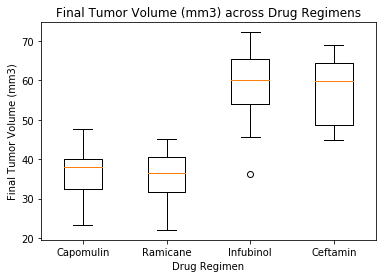

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Creating list for tumor volume by Capomulin regimen
capomulin_data = final_timepoint.loc[final_timepoint['Drug Regimen']=='Capomulin']
capomulin_tumor_data = capomulin_data.loc[:,'Tumor Volume (mm3)']
capomulin_final_tumor_volume = np.array(capomulin_tumor_data)

# # Creating list for tumor volume by Ramicane regimen
ramicane_data = final_timepoint.loc[final_timepoint['Drug Regimen']=='Ramicane']
ramicane_tumor_data = ramicane_data.loc[:,'Tumor Volume (mm3)']
ramicane_final_tumor_volume = np.array(ramicane_tumor_data)

# Creating list for tumor volume by Infubinol regimen
infubinol_data = final_timepoint.loc[final_timepoint['Drug Regimen']=='Infubinol']
infubinol_tumor_data = infubinol_data.loc[:,'Tumor Volume (mm3)']
infubinol_final_tumor_volume = np.array(infubinol_tumor_data)

# Creating list for tumor volume by Ceftamin regimen
ceftamin_data = final_timepoint.loc[final_timepoint['Drug Regimen']=='Ceftamin']
ceftamin_tumor_data = ceftamin_data.loc[:,'Tumor Volume (mm3)']
ceftamin_final_tumor_volume = np.array(ceftamin_tumor_data)

# Generating all the 4 box plots in one chart
tumor_volume_regimen = [capomulin_final_tumor_volume, ramicane_final_tumor_volume, infubinol_final_tumor_volume, 
                        ceftamin_final_tumor_volume]
treatment = ('Capomulin','Ramicane','Infubinol','Ceftamin')

fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume (mm3) across Drug Regimens')
ax7.boxplot(tumor_volume_regimen)
ax7.set_ylabel('Final Tumor Volume (mm3)')
ax7.set_xlabel('Drug Regimen')
ax7.set_xticklabels(treatment)

plt.show()

## Line and scatter plots

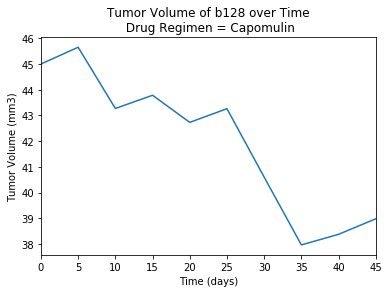

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_ID = 'b128'
c_data_k403 = combined_data.loc[(combined_data['Mouse ID']==mouse_ID)&(combined_data['Drug Regimen']=='Capomulin')]
c_data_k403
c_timepoint = np.array(c_data_k403['Timepoint'])
c_tumor_volume = np.array(c_data_k403['Tumor Volume (mm3)'])
plt.plot(c_timepoint, c_tumor_volume)

# Adding in some formatting
plt.xlim(min(c_timepoint),max(c_timepoint))
plt.title(f"Tumor Volume of {mouse_ID} over Time\n Drug Regimen = Capomulin")
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

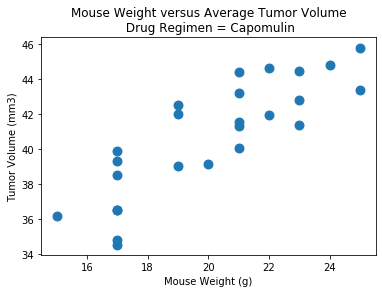

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Creating a table with average tumor volume by mouse ID
c_data = combined_data.loc[(combined_data['Drug Regimen']=='Capomulin')]
c_data_average = c_data.groupby('Mouse ID').mean()
c_data_average = c_data_average.loc[:,('Weight (g)','Tumor Volume (mm3)')]

# generating the scatter plot
mouse_weight = np.array(c_data_average['Weight (g)'])
tumor_volume = np.array(c_data_average['Tumor Volume (mm3)'])

plt.scatter(mouse_weight, tumor_volume, marker="o", s = 80)

# add formatting to scatter plot
plt.title('Mouse Weight versus Average Tumor Volume\n Drug Regimen = Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

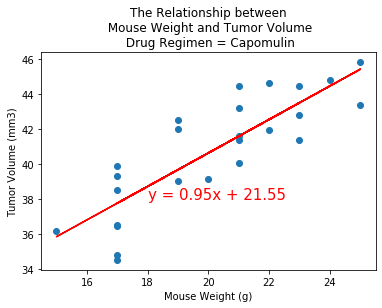

The correlation coefficient between mouse weight and tumor volume is 0.84
The r-square value is 0.71
The p-value is 0.0


In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, tumor_volume)

reg_fit = slope * mouse_weight + intercept
plt.scatter(mouse_weight,tumor_volume)
plt.plot(mouse_weight,reg_fit,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('The Relationship between\n Mouse Weight and Tumor Volume\n Drug Regimen = Capomulin')
equation = (f"y = {round(slope,2)}x + {round(intercept,2)}")
plt.annotate(equation,(18,38),fontsize=15,color="red")

plt.show()

print(f"The correlation coefficient between mouse weight and tumor volume is {round(r_value,2)}")
print(f"The r-square value is {round(r_value**2,2)}")
print(f"The p-value is {round(p_value,2)}")